In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Keerthana\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [30]:
# load the dataset
pixar_movies = pd.read_csv("updated_pixar_data.csv")

In [31]:
pixar_movies.head()

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3,0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1,0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1,0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3,1
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4,1


In [32]:
# checking the datatypes of all the columns

pixar_movies.dtypes

Year Released              float64
Movie                       object
Length                     float64
RT Score                   float64
IMDB Score                 float64
Metacritic Score           float64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget          float64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

In [33]:
# getting a rough idea of the data set through the summary statistics

pixar_movies.describe()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Production Budget,Oscars Nominated,Oscars Won
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,14.000000,14.000000
mean,2006.625000,101.437500,88.562500,7.812500,81.750000,66.188750,582.757188,247.437500,303.473750,335.325000,136.781250,2.857143,0.785714
std,6.152235,9.598394,16.190404,0.647945,12.439185,23.608561,218.868959,78.039263,92.764381,150.325165,59.237085,2.032700,0.801784
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,136.815000,81.400000,78.860000,55.400000,30.000000,0.000000,0.000000
25%,2002.500000,96.000000,78.000000,7.275000,72.000000,54.792500,479.250000,202.750000,250.745000,233.875000,91.500000,1.000000,0.000000
50%,2007.500000,101.000000,96.000000,8.000000,88.000000,64.700000,549.450000,245.000000,310.745000,319.150000,162.500000,3.000000,1.000000
75%,2011.250000,108.000000,98.250000,8.300000,92.000000,73.460000,690.650000,274.625000,358.687500,422.550000,185.625000,4.750000,1.000000
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,200.000000,6.000000,2.000000


In [34]:
# Domestic % column is of the datatype - Object. Changing that to a float datatype

pixar_movies["Domestic %"] = pixar_movies["Domestic %"].str.rstrip("%").astype(float)

In [35]:
# International % column is of the datatype - Object. Changing that to a float datatype

pixar_movies["International %"] = pixar_movies["International %"].str.rstrip("%").astype(float)

In [36]:
pixar_movies.head()

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3,0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1,0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1,0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3,1
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4,1


In [37]:
# changing the scale of the IMDB Score column from a 10 point scale to a 100 point scale to match the RT and Metacritic score 
# scales

pixar_movies["IMDB Score"] = pixar_movies["IMDB Score"]*10

In [38]:
pixar_movies.head()

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,83,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3,0
1,1998,A Bug's Life,96,92,72,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1,0
2,1999,Toy Story 2,92,100,79,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1,0
3,2001,"Monsters, Inc.",90,96,81,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3,1
4,2003,Finding Nemo,104,99,82,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4,1


In [39]:
pixar_movies

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,83,92,29.14,362.000,191.8,356.21,170.2,52.98,47.02,30.0,3,0
1,1998,A Bug's Life,96,92,72,77,33.26,363.400,162.8,277.18,200.6,44.80,55.20,45.0,1,0
2,1999,Toy Story 2,92,100,79,88,57.39,485.000,245.9,388.43,239.2,50.70,49.32,90.0,1,0
3,2001,"Monsters, Inc.",90,96,81,78,62.58,528.800,255.9,366.12,272.9,48.39,51.61,115.0,3,1
4,2003,Finding Nemo,104,99,82,90,70.25,895.600,339.7,457.46,555.9,37.93,62.07,94.0,4,1
5,2004,The Incredibles,115,97,80,90,70.47,631.400,261.4,341.28,370.0,41.40,58.60,92.0,4,2
6,2006,Cars,116,74,72,73,60.12,462.000,244.1,302.59,217.9,52.84,47.16,70.0,2,0
7,2007,Ratatouille,111,96,80,96,47.00,623.700,206.4,243.65,417.3,33.09,66.91,150.0,5,1
8,2008,WALL-E,97,96,84,94,63.10,521.300,223.8,253.11,297.5,42.93,57.07,180.0,6,1
9,2009,Up,96,98,83,88,68.11,731.300,293.0,318.90,438.3,40.07,59.93,175.0,5,2


In [40]:
# dropping rows with NaN 
# cleaning the dataset

filtered_pixar = pixar_movies.dropna()

In [41]:
pixar_movies

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,83,92,29.14,362.000,191.8,356.21,170.2,52.98,47.02,30.0,3,0
1,1998,A Bug's Life,96,92,72,77,33.26,363.400,162.8,277.18,200.6,44.80,55.20,45.0,1,0
2,1999,Toy Story 2,92,100,79,88,57.39,485.000,245.9,388.43,239.2,50.70,49.32,90.0,1,0
3,2001,"Monsters, Inc.",90,96,81,78,62.58,528.800,255.9,366.12,272.9,48.39,51.61,115.0,3,1
4,2003,Finding Nemo,104,99,82,90,70.25,895.600,339.7,457.46,555.9,37.93,62.07,94.0,4,1
5,2004,The Incredibles,115,97,80,90,70.47,631.400,261.4,341.28,370.0,41.40,58.60,92.0,4,2
6,2006,Cars,116,74,72,73,60.12,462.000,244.1,302.59,217.9,52.84,47.16,70.0,2,0
7,2007,Ratatouille,111,96,80,96,47.00,623.700,206.4,243.65,417.3,33.09,66.91,150.0,5,1
8,2008,WALL-E,97,96,84,94,63.10,521.300,223.8,253.11,297.5,42.93,57.07,180.0,6,1
9,2009,Up,96,98,83,88,68.11,731.300,293.0,318.90,438.3,40.07,59.93,175.0,5,2


In [42]:
# setting the movie name as the index

pixar_movies.set_index("Movie",inplace=True)

In [43]:
pixar_movies.head(2)

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
Movie,,,,,,,,,,,,,,,
Toy Story,1995,81,100,83,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3,0
A Bug's Life,1998,96,92,72,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1,0


In [44]:
filtered_pixar

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,83,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3,0
1,1998,A Bug's Life,96,92,72,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1,0
2,1999,Toy Story 2,92,100,79,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1,0
3,2001,"Monsters, Inc.",90,96,81,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3,1
4,2003,Finding Nemo,104,99,82,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4,1
5,2004,The Incredibles,115,97,80,90,70.47,631.4,261.4,341.28,370.0,41.40,58.60,92,4,2
6,2006,Cars,116,74,72,73,60.12,462.0,244.1,302.59,217.9,52.84,47.16,70,2,0
7,2007,Ratatouille,111,96,80,96,47.00,623.7,206.4,243.65,417.3,33.09,66.91,150,5,1
8,2008,WALL-E,97,96,84,94,63.10,521.3,223.8,253.11,297.5,42.93,57.07,180,6,1
9,2009,Up,96,98,83,88,68.11,731.3,293.0,318.90,438.3,40.07,59.93,175,5,2


In [45]:
filtered_pixar.set_index("Movie",inplace=True)

### Question 1 - How did the movies do on different Rating websites?

In [46]:
critics_reviews = pixar_movies[["RT Score","IMDB Score","Metacritic Score"]]

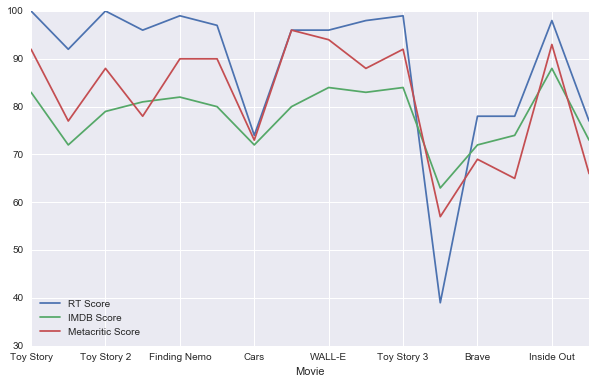

In [47]:
critics_reviews.plot(figsize = (10,6))
plt.show()

### _ Insight 1 - Rotten Tomatoes seems to be giving the highest scores consistently among the three_


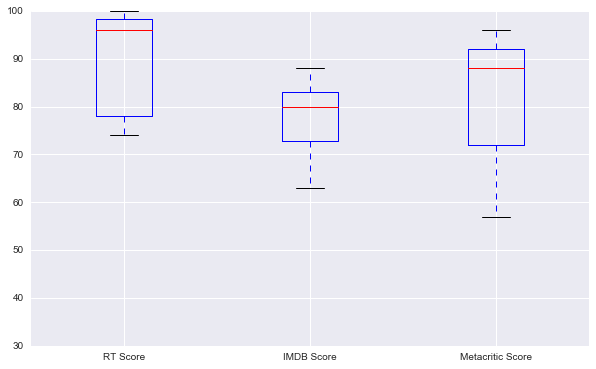

In [48]:
critics_reviews.plot(figsize = (10,6),kind="box")
plt.show()

### _Clearly, RT seems to be giving the highest scores among the three websites and Metacritic scores are more distributed, ranging from 56-95_

### How has the ratio of where the revenue comes from changed since the first movie? Now that Pixar is more well known internationally, is more revenue being made internationally for newer movies?

In [49]:
revenue_proportions = pixar_movies[["Domestic %","International %"]]

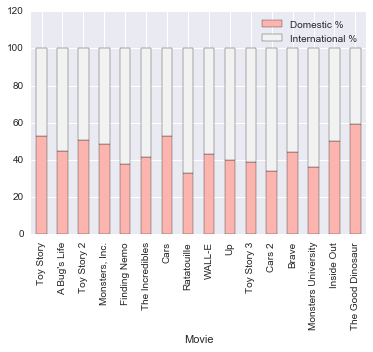

In [61]:
revenue_proportions.plot(kind="bar",stacked=True,colormap="Pastel1")

### _Insight 2 - The domestic % of the revenue seemed to be decreasing until Mosters University and picked up in the last two movies - Inside out and The Good Dinosaur_

Create a grouped bar plot to explore if there's any correlation between the number of Oscars a movie was nominated for and the number it actually won.
What plots can you generate to better understand which columns correlate with the Adjusted Domestic Gross revenue column?

In [66]:
oscars = filtered_pixar[["Oscars Nominated","Oscars Won"]]

In [67]:
oscars.head()

,Oscars Nominated,Oscars Won
Movie,,
Toy Story,3,0
A Bug's Life,1,0
Toy Story 2,1,0
"Monsters, Inc.",3,1
Finding Nemo,4,1


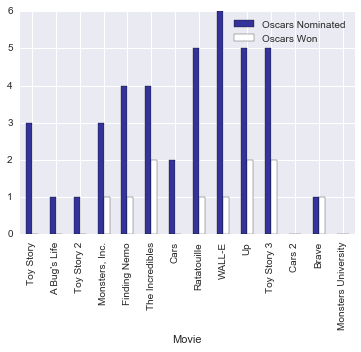

In [71]:
oscars.plot(kind="bar",colormap="terrain")

### _Insight 3 - There definitely seems to be a correlation between the no. of nominations and and the number of oscars won_

In [89]:
profit_pixar = pixar_movies[["Adjusted Domestic Gross","Production Budget"]]

In [90]:
profit_pixar.loc[:,"Turnover ratio"] = profit_pixar["Adjusted Domestic Gross"]/profit_pixar["Production Budget"]

In [91]:
profit_pixar

,Adjusted Domestic Gross,Production Budget,Turnover ratio
Movie,,,
Toy Story,356.21,30.0,11.873667
A Bug's Life,277.18,45.0,6.159556
Toy Story 2,388.43,90.0,4.315889
"Monsters, Inc.",366.12,115.0,3.183652
Finding Nemo,457.46,94.0,4.866596
The Incredibles,341.28,92.0,3.709565
Cars,302.59,70.0,4.322714
Ratatouille,243.65,150.0,1.624333
WALL-E,253.11,180.0,1.406167


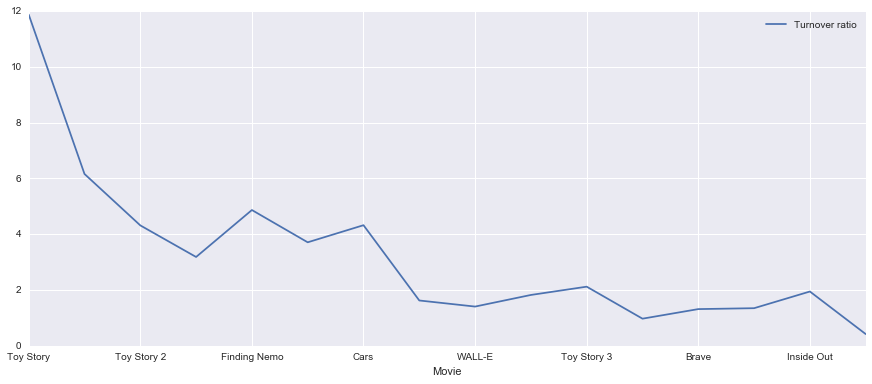

In [101]:
profit_pixar[["Turnover ratio"]].plot(figsize=(15,6))

### _Insight 4 - The Domestic Gross to budget ratio has been going down steadily for Pixar movies_

### Is the opening weekend revenue a good indicator of the final outcome of revenue?


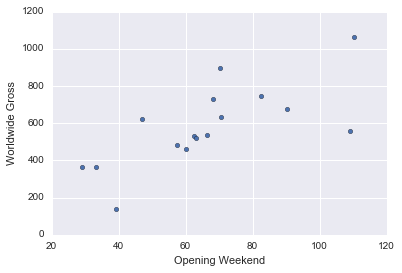

In [106]:
pixar_movies.plot(kind='scatter',x="Opening Weekend",y="Worldwide Gross")


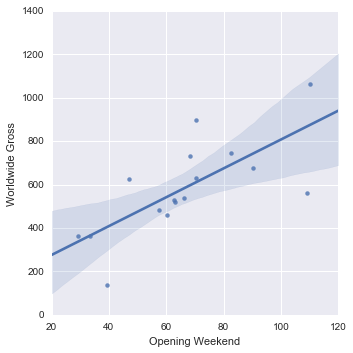

In [107]:
sns.lmplot(x="Opening Weekend",y="Worldwide Gross",data=pixar_movies)

### _Insight 5 - In general, there seems to be a fair correlation between the variables, indicating that opening weekend revenue can be a decent indicator of the final revenue